In [10]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = pd.read_csv('./data/archive.zip', compression='zip')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [13]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [14]:
col_names = list(df)
col_names.remove('Bankrupt?')
col_names

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net 

In [15]:
df.corr(method='pearson')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
import numpy as np

def drop_highly_correlated(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop)

df = drop_highly_correlated(df)

df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,...,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,1,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,...,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,1,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,...,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,1,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,...,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,1,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,...,0.578469,0.311567,0.047725,0,0.003878,0.623521,0.024752,0.575617,1,0.035490


<h3>We encounter here a significant issue in class imbalance of nearly 30%</h3>

In [100]:
print(df['Bankrupt?'].value_counts())
ratio = df['Bankrupt?'].value_counts()[0] / df['Bankrupt?'].value_counts()[1]
print('Ratio of classes is: ', ratio)

0    6599
1     220
Name: Bankrupt?, dtype: int64
Ratio of classes is:  29.995454545454546


<h2>Class Balancing</h2>

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:, df.columns != 'Bankrupt?'], df['Bankrupt?'], test_size=0.3, random_state=42, stratify=df['Bankrupt?'])

In [102]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
3295,0.531760,0.562582,0.575994,0.611576,0.611576,0.999121,0.797501,0.809413,0.303400,0.781681,...,0.809775,0.000557,0.624058,0.611572,0.841063,0.278731,0.027301,0.566798,1,0.034138
2232,0.468630,0.541867,0.525082,0.601010,0.601010,0.999012,0.797413,0.809368,0.303474,0.781630,...,0.800577,0.030763,0.619200,0.601011,0.840652,0.287100,0.028223,0.568058,1,0.018026
5538,0.507093,0.554187,0.558702,0.611972,0.611986,0.999132,0.797542,0.809430,0.303451,0.781743,...,0.808595,0.002987,0.625407,0.611967,0.840884,0.277676,0.026885,0.565571,1,0.042552
6282,0.483937,0.533635,0.529043,0.601183,0.601183,0.999032,0.797401,0.809308,0.303413,0.781576,...,0.796247,0.001312,0.622709,0.601181,0.840060,0.277462,0.027413,0.567025,1,0.045048
2143,0.481695,0.571031,0.539162,0.631942,0.631070,0.999006,0.797513,0.809443,0.303662,0.781641,...,0.813941,0.000280,0.624105,0.631942,0.840950,0.275351,0.026791,0.565159,1,0.154753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,0.550090,0.563890,0.593501,0.602221,0.602221,0.999046,0.797482,0.809400,0.303527,0.781665,...,0.811639,0.318807,0.623799,0.602217,0.841515,0.281613,0.026865,0.565486,1,0.024197
1078,0.481597,0.528129,0.530007,0.605933,0.605954,0.999021,0.797349,0.809262,0.303343,0.781612,...,0.791904,0.001990,0.623473,0.605932,0.839643,0.282249,0.025451,0.588994,1,0.023023
6687,0.622288,0.707697,0.689330,0.614293,0.603353,0.998882,0.799178,0.811001,0.306831,0.783383,...,0.875503,0.002238,0.624557,0.614294,0.844092,0.275407,0.026794,0.565172,1,0.143685
2623,0.586847,0.642172,0.623374,0.609774,0.609759,0.999064,0.797540,0.809426,0.303589,0.781686,...,0.856548,0.000987,0.623850,0.609770,0.843796,0.277000,0.026791,0.565159,1,0.051988


<h2>SMOTE Oversampling</h2>

In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [104]:
print(X_train.value_counts())
print(y_train.value_counts())

 ROA(C) before interest and depreciation before interest   ROA(A) before interest and % after tax   ROA(B) before interest and depreciation after tax   Operating Gross Margin   Realized Sales Gross Margin   Operating Profit Rate   Pre-tax net Interest Rate   After-tax net Interest Rate   Non-industry income and expenditure/revenue   Continuous interest rate (after tax)   Operating Expense Rate   Research and development expense rate   Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)   Net Value Per Share (B)   Net Value Per Share (A)   Net Value Per Share (C)   Persistent EPS in the Last Four Seasons   Cash Flow Per Share   Revenue Per Share (Yuan ¥)   Operating Profit Per Share (Yuan ¥)   Per Share Net profit before tax (Yuan ¥)   Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate   After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate   Continuous Net Profit Growth Rate   Total Asset Growth Rate   Net Value Growth Rate   Total Asset 

In [105]:
print(X_train_smote.value_counts())
print(y_train_smote.value_counts())

 ROA(C) before interest and depreciation before interest   ROA(A) before interest and % after tax   ROA(B) before interest and depreciation after tax   Operating Gross Margin   Realized Sales Gross Margin   Operating Profit Rate   Pre-tax net Interest Rate   After-tax net Interest Rate   Non-industry income and expenditure/revenue   Continuous interest rate (after tax)   Operating Expense Rate   Research and development expense rate   Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)   Net Value Per Share (B)   Net Value Per Share (A)   Net Value Per Share (C)   Persistent EPS in the Last Four Seasons   Cash Flow Per Share   Revenue Per Share (Yuan ¥)   Operating Profit Per Share (Yuan ¥)   Per Share Net profit before tax (Yuan ¥)   Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate   After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate   Continuous Net Profit Growth Rate   Total Asset Growth Rate   Net Value Growth Rate   Total Asset 

<h2>Fitting transforms</h2>

In [106]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#We use label econder to encode target variable and standard scaler for explaining data
label_encoder = LabelEncoder()
scaler = StandardScaler()

y_train = label_encoder.fit_transform(y_train)
y_train_smote = label_encoder.fit_transform(y_train_smote)
y_test = label_encoder.fit_transform(y_test)

X_train = scaler.fit_transform(X_train)
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.fit_transform(X_test)

In [107]:
X_test

array([[ 0.30644177,  0.54079131,  0.42505076, ..., -0.02219262,
         0.        ,  0.25467039],
       [ 1.82913202,  1.57893462,  1.56244675, ..., -0.01929424,
         0.        ,  0.12741279],
       [ 0.73814065,  0.79045006,  0.73961184, ...,  0.00902419,
         0.        , -0.4479253 ],
       ...,
       [-0.15441501,  0.11544676, -0.013913  , ...,  0.04434834,
         0.        ,  0.16694822],
       [-0.70922502, -0.43346625, -0.54084723, ..., -0.17726176,
         0.        ,  0.10427625],
       [ 0.26918445,  0.3558589 ,  0.23133801, ...,  0.02767624,
         0.        , -0.62435852]])

<h3>Model Training</h3>

In [108]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from category_encoders import TargetEncoder

estimators = [
    ('clf', XGBClassifier(random_state=42)) #random state has to match th results from previous cells to maintain scores and data integrity
]

pipeline = Pipeline(steps=estimators)

pipeline

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [109]:
search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode': Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipeline, search_space, cv=5, n_iter=2, scoring='roc_auc', random_state=42)
opt_smote = BayesSearchCV(pipeline, search_space, cv=5, n_iter=100, scoring='roc_auc', random_state=42)

In [110]:
#testing training
import numpy as np
x = XGBClassifier().fit(X_train, y_train)
np.unique(x.predict(X_train_smote))

array([0, 1])

In [111]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       feature_weights=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       int...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [112]:
opt_smote.fit(X_train_smote, y_train_smote)

KeyboardInterrupt: 

<h2>Optimizer evaluation</h2>

In [ ]:
y_pred = xgboost_step = opt.best_estimator_.named_steps['clf'].predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(y_test, y_pred, multi_class='ovr')
roc_curve(y_test, y_pred)

opt.best_estimator_

In [113]:
opt_smote.best_estimator_

AttributeError: 'BayesSearchCV' object has no attribute 'best_estimator_'

In [114]:
opt.best_score_

0.9308517400112131

In [ ]:
opt_smote.best_score_

In [115]:
import seaborn as sb
opt.score(X_train, y_train)

0.9604035280588648

In [ ]:
opt_smote.score(X_train, y_train)

In [116]:
opt.best_estimator_.steps[0]

('clf',
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=0.705051979426657,
               colsample_bynode=0.8638628715886625,
               colsample_bytree=0.966433999423917, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=3.1579959348704874, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.10243393225105074,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, ...))

In [ ]:
opt_smote.best_estimator_.steps

In [117]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.705051979426657,
                               colsample_bynode=0.8638628715886625,
                               colsample_bytree=0.966433999423917, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=3.1579959348704874, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.10243393225105074, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None, ...))])

<h2>Feature importance analysis</h2>

In [118]:
opt.best_estimator_.named_steps['clf'].booster().get_fscore()

TypeError: 'NoneType' object is not callable

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

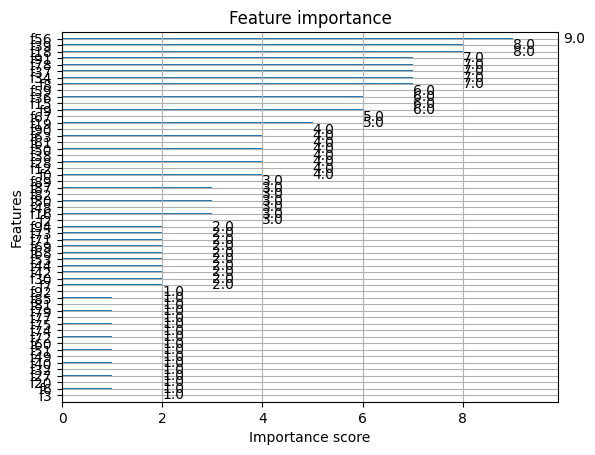

In [124]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.named_steps['clf']
xgboost_model = xgboost_step

plot_importance(xgboost_model)

In [125]:
print(type(opt.best_estimator_.named_steps['clf']))
opt.best_estimator_.named_steps['clf']

<class 'xgboost.sklearn.XGBClassifier'>


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.705051979426657,
              colsample_bynode=0.8638628715886625,
              colsample_bytree=0.966433999423917, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=3.1579959348704874, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.10243393225105074,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [126]:
print(opt.best_estimator_.named_steps['clf'].feature_importances_)

[0.01934109 0.         0.01036284 0.00483592 0.         0.
 0.02319867 0.00539672 0.02713535 0.02485454 0.         0.
 0.00891229 0.         0.         0.0099196  0.02880245 0.
 0.03343054 0.00624067 0.01718434 0.         0.         0.
 0.         0.         0.         0.00636172 0.00838832 0.
 0.00519943 0.         0.02017568 0.         0.01214384 0.
 0.03464409 0.01574038 0.00801505 0.0723723  0.00575537 0.
 0.17269327 0.         0.0050339  0.         0.         0.
 0.00660103 0.01077224 0.00745293 0.0072068  0.         0.00656119
 0.         0.         0.00671004 0.         0.         0.00683107
 0.00604343 0.00690512 0.         0.00702141 0.         0.
 0.         0.03564439 0.01337535 0.00614127 0.         0.00849291
 0.00561968 0.00776117 0.00950387 0.00874453 0.         0.01200094
 0.00666652 0.00651575 0.01087018 0.00847689 0.00899719 0.
 0.         0.05072392 0.         0.00835189 0.         0.00964399
 0.00757098 0.00741318 0.00728329 0.         0.10195847]


In [ ]:
xgboost_step_smote = opt_smote.best_estimator_.steps[1]
xgboost_model_smote = xgboost_step_smote[1]
plot_importance(xgboost_model_smote)

<h3>Shapes before and after splitting match so we can proceed to sampling from flattened data<h3>

In [140]:
print(df.shape)

(6819, 96)


In [139]:
print(X_train.shape)
print(X_train.flatten())

(4773, 95)
[ 0.45176654  0.0771419   0.37393853 ... -0.05241326  0.
 -0.64505702]


In [145]:
np.random.seed(42)
shap.initjs()
#wrong!
#sampled_data = np.random.choice(X_train.flatten(), 100)
#sampled_data_smote = np.random.choice(X_train_smote.flatten(), 100)

<h2>Encode back the header to understand the data</h2>

In [171]:
X_train = scaler.inverse_transform(X_train)

X_train = pd.DataFrame(X_train)
sampled_data = X_train.sample(100, random_state=42)
sampled_data.set_axis(col_names, axis=1,inplace=True)

sampled_data.head(2)

C:\Users\X\AppData\Local\Temp\ipykernel_19572\4258060200.py:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sampled_data.set_axis(col_names, axis=1,inplace=True)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
33,0.416696,0.428136,0.459341,0.599275,0.599281,0.998845,0.796485,0.808162,0.302490,0.780974,...,0.682005,-2.133982e+06,0.623694,0.599270,0.814380,0.282887,0.026915,0.564608,1.0,0.024390
555,0.485968,0.543568,0.534037,0.606387,0.605969,0.998904,0.797190,0.809066,0.303104,0.781431,...,0.800699,-2.133982e+06,0.624360,0.606385,0.840009,0.284393,0.027100,0.566861,1.0,0.022935


In [164]:
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(sampled_data)

In [165]:
explainer_smote = shap.TreeExplainer(xgboost_model_smote)
shap_values_smote = explainer.shap_values(sampled_data_smote)

NameError: name 'xgboost_model_smote' is not defined

In [166]:
shap.force_plot(explainer.expected_value, shap_values[0,:], sampled_data.iloc[0,:])

In [ ]:
shap.force_plot(explainer_smote.expected_value, shap_values_smote[0,:], sampled_data_smote.iloc[0,:])

In [167]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [ ]:
shap.force_plot(explainer_smote.expected_value, shap_values_smote, X_train_smote)

C:\Users\X\AppData\Local\Temp\ipykernel_19572\2516788097.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, sampled_data)


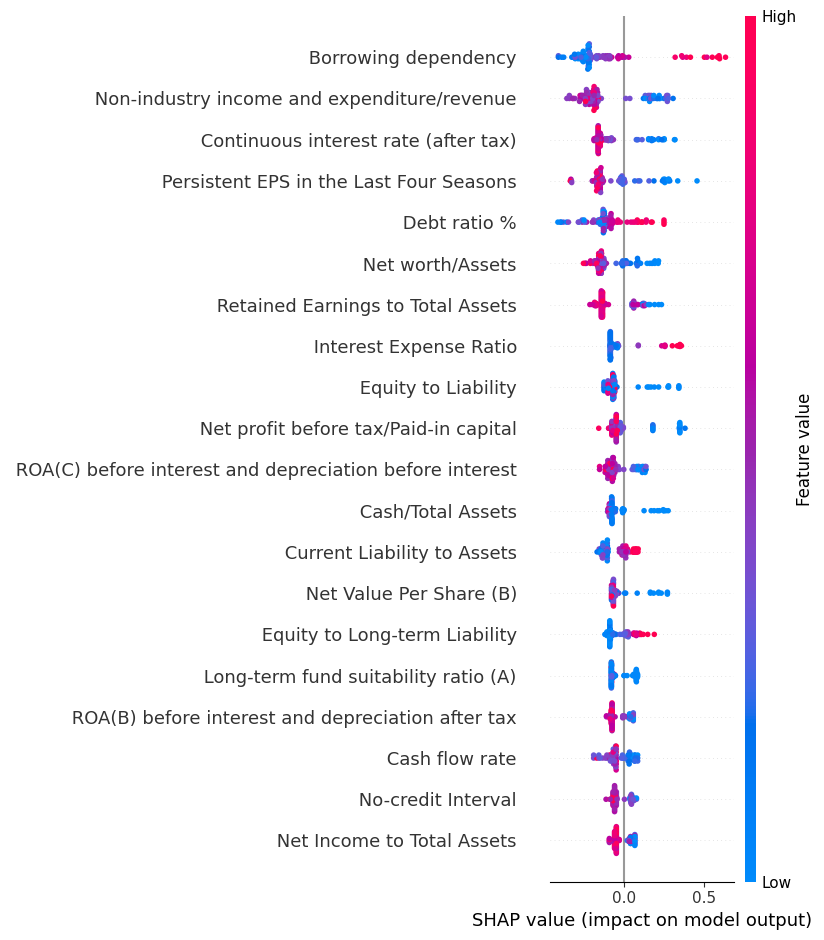

In [168]:
shap.summary_plot(shap_values, sampled_data)

In [ ]:
shap.summary_plot(shap_values_smote, sampled_data_smote)

C:\Users\X\AppData\Local\Temp\ipykernel_19572\2157091365.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, sampled_data, plot_type="bar")


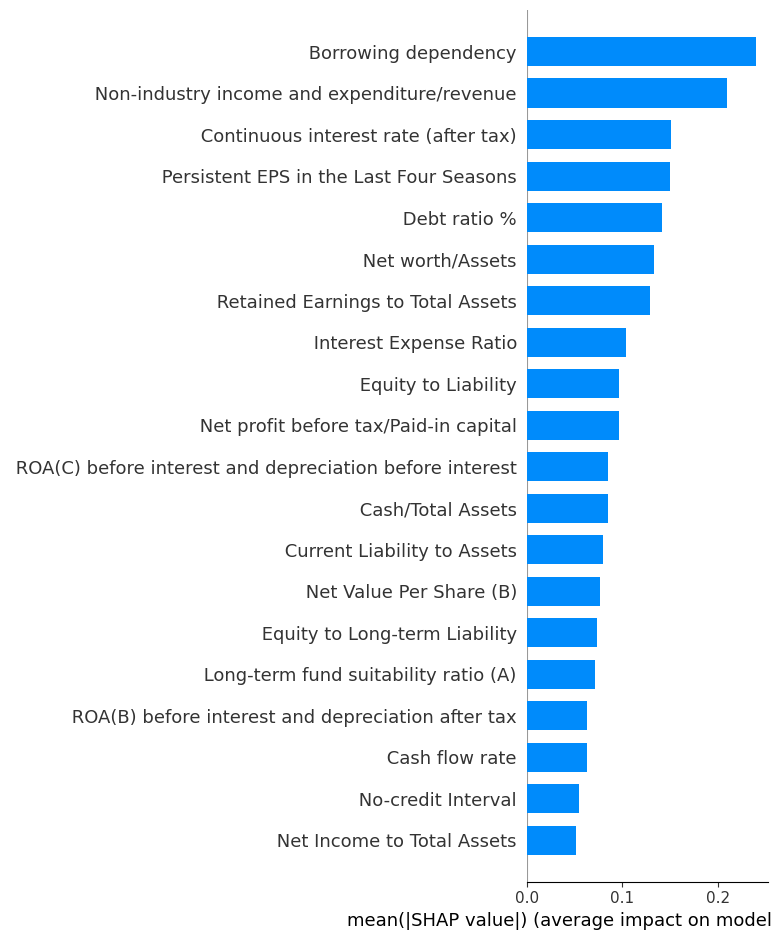

In [169]:
shap.summary_plot(shap_values, sampled_data, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values_smote, sampled_data_smote, plot_type="bar")

<h2>Ceteris Paribus Approach</h2>

In [ ]:
import dalex as dx
bankruptcy_rf_exp = dx.Explainer(xgboost_model, X_train, y_train, 
                    label = "Titanic RF Pipeline")

henry = pd.DataFrame({'gender'   : ['male'],
                       'age'     : [47],
                       'class'   : ['1st'],
                       'embarked': ['Cherbourg'],
                       'fare'    : [25],
                       'sibsp'   : [0],
                       'parch'   : [0]},
                      index = ['Henry'])

In [ ]:
profiler = bankruptcy_rf_exp.predict_profile(henry)
profiler.result